<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LauraIran7/blob/main/Reduccion_dimensiones_A01794099.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programa: Maestría en Inteligencia Artificial Aplicada (MNA-V)
##Tecnológico de Monterrey

##**Curso: Ciencia y Analítica de Datos**

###Actividad Semanal - 5 : Repaso Transformación y reducción de dimensiones

Fecha de Entrega: Jueves 27 de Octubre de 2022.


**Prof: Dra. María de la Paz Rico Fernández**


####**Alumna: Laura Irán González Ojeda - A01794099**


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [5]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=np.matmul(np.matmul(W,D),Winv) 
print(B)
print("-----------------------------")



-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [6]:
#Matriz 
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[3, 0,2], [3, 0, -2], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) 
print(vectors) 

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
#C=np.dot(np.dot(W,D),Winv) 
B=np.matmul(np.matmul(W,D),Winv) 
print(B)
#print(C)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  0  1]]
-----------------------------
[0. 3. 1.]
[[ 0.          0.70710678 -0.19245009]
 [ 1.          0.70710678 -0.96225045]
 [ 0.          0.          0.19245009]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  0.  1.]]
-----------------------------


In [7]:
#Matriz 2
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[1, 3,8], [2, 0, 0], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) 
print(vectors) 

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
#C=np.dot(np.dot(W,D),Winv) 
B=np.matmul(np.matmul(W,D),Winv) 
print(B)
#print(C)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 1 1]]
-----------------------------
[ 3.92379129+0.j         -0.96189565+1.27409273j -0.96189565-1.27409273j]
[[-0.88038364+0.j          0.35651441-0.47222629j  0.35651441+0.47222629j]
 [-0.44874132+0.j         -0.7412746 +0.j         -0.7412746 -0.j        ]
 [-0.15347926+0.j          0.26575498+0.17258639j  0.26575498-0.17258639j]]
-------Matriz reconstruida-------
[[ 1.00000000e+00-3.36380324e-18j  3.00000000e+00-1.27783876e-18j
   8.00000000e+00-3.63810951e-16j]
 [ 2.00000000e+00+1.29226204e-17j  4.44089210e-16-6.14122168e-18j
   3.99680289e-15-6.81211015e-17j]
 [-3.60822483e-16+1.41380986e-17j  1.00000000e+00-8.44264451e-18j
   1.00000000e+00-1.79705568e-16j]]
-----------------------------


In [8]:
#Matriz 3
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[5, 4,0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) 
print(vectors) 

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
#C=np.dot(np.dot(W,D),Winv) 
B=np.matmul(np.matmul(W,D),Winv) 
print(B)
#print(C)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


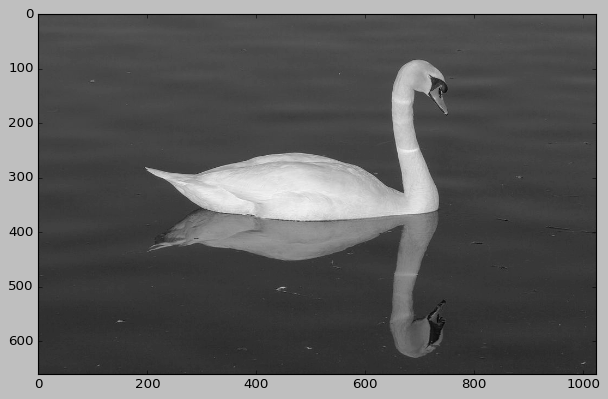

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F084DE92910>


In [9]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [10]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [11]:
U.shape

(660, 660)

In [12]:
V.shape

(1024, 1024)

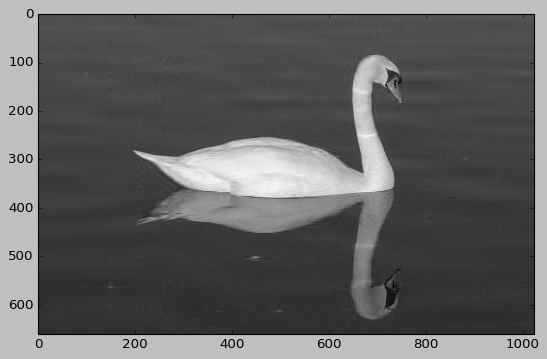

Felicidades la imagen está comprimida


In [13]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[17. 18. 18. ... 14. 22. 26.]


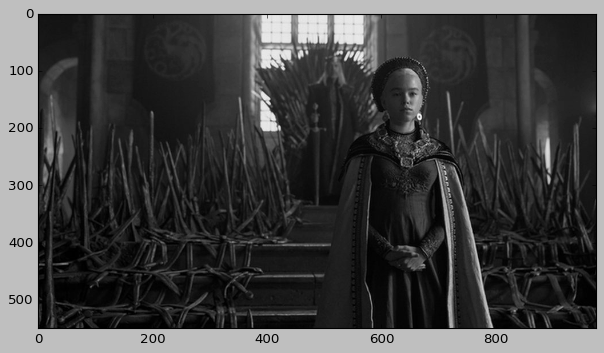

<PIL.Image.Image image mode=LA size=976x549 at 0x7F084B850950>


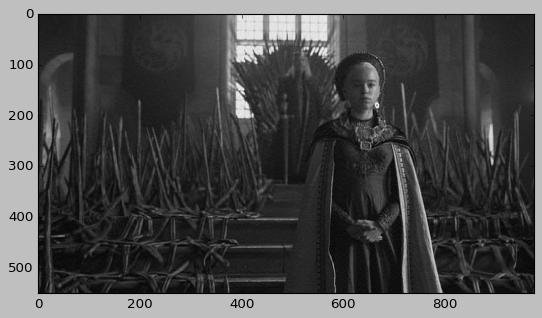

Felicidades la imagen está comprimida


In [20]:
#imagen 1 - Rhaenyra Targaryen
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('http://c.files.bbci.co.uk/17624/production/_126408759_milly-alcock-paddy-considine.jpg')).convert('LA')

imggray = img.convert('LA') 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape
V.shape

nvalue = 100   #nvalue con valor de 100 nos da una resolución de imagen prácticamente similar
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[ 88.  88.  89. ... 175. 175. 174.]


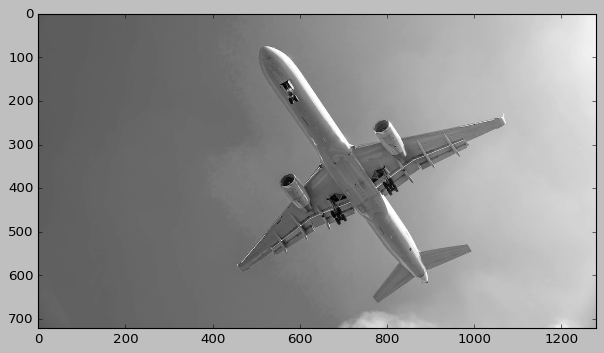

<PIL.Image.Image image mode=LA size=1280x720 at 0x7F084B5EF190>


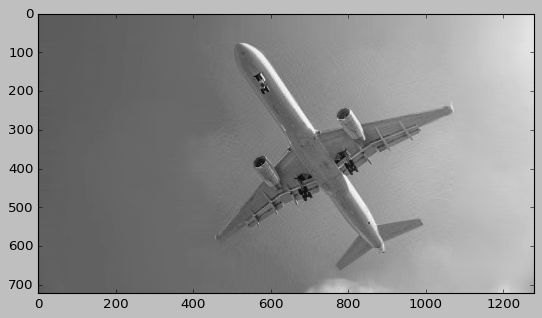

Felicidades la imagen está comprimida


In [26]:
#imagen 2 - Avión
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.oneair.es/wp-content/uploads/2022/03/que-es-el-fuselaje-de-un-avion.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape
V.shape

nvalue = 75    # con nvalue con valor a 75 se visualiza un decremento en la resolución de la imagen
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[214. 214. 214. ... 214. 215. 220.]


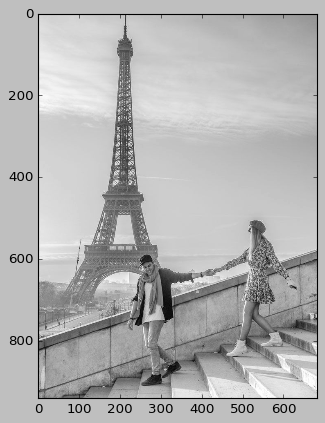

<PIL.Image.Image image mode=LA size=684x940 at 0x7F084B630990>


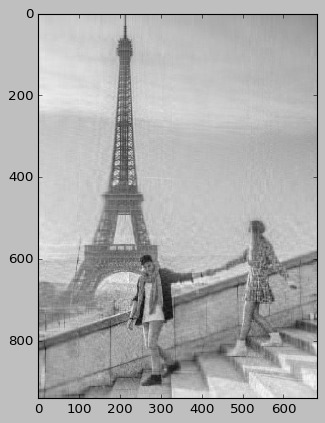

Felicidades la imagen está comprimida


In [25]:
#imagen 3 -Paris
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://cdn.viviendodeviaje.com/wp-content/uploads/2020/03/05192830/que-ver-en-paris-50-cosas.jpg')).convert('LA')

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape
V.shape

nvalue = 45 # con nvalue con valor a 45 vemos que la imagen  reduce la calidad considerablemente
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [27]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

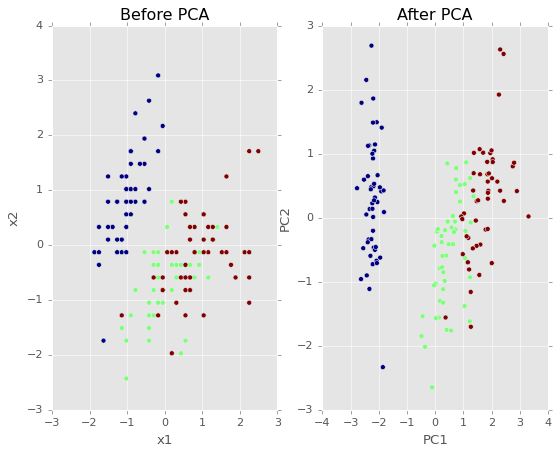

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [29]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


**Describe lo relevante del ejercicio y que descubriste de las variables análizadas.**

PCA permite identificar las variables que aportan más información de un dataset, y descartar las menos relevantes. El proceso de descarte de las variables menos relevantes se le conoce como la reducción de dimensionalidad, que de hecho es una de las aplicaciones principales del PCA.

Otra de las aplicaciones de PCA es la detección de anomalías, ya que PCA analiza las variables que definen lo que corresponde a un comportamiento normal, para después aplicar distintas métricas de distancia (varianza) que identifiquen los casos que se alejan de este comportamiento.

Este tipo de análisis de datos es muy útil para poder relacionar variables entre ellas y entender cómo están relacionadas entre ellas.

##**Preguntas de la actividad**

 * **¿Qué es feature importance y para que nos sirve?**

 Features Importance se refiere a las técnicas que calculan una puntuación para todas las características de entrada para un modelo dado; las puntuaciones simplemente representan la "importancia" de cada feature. Una puntuación más alta significa que la característica específica tendrá un mayor efecto en el modelo que se utiliza para predecir una determinada variable.

  Features Importance nos sirve para el mejor entendimiento de nuestros datos, poder ver cuando nuestro modelo está funcionando de manera contra-intuitiva y también para demostrar a terceros cuando el funcionamiento es correcto.


 * **¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**



**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**